# Logistic Regression - Wine Quality Dataset

## Overview
Logistic Regression is a supervised learning algorithm used for **binary classification**.
Instead of predicting a continuous value, it estimates the probability that an observation
belongs to a particular class.

In this notebook, we classify wines as:
- **High quality (1)** if quality ≥ 6  
- **Low quality (0)** if quality < 6  

This notebook includes:
- Data loading and preprocessing
- Training a Logistic Regression classifier
- Model evaluation and visualization
- Inline testing to ensure correctness and reproducibility


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int).values  # Binary target

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Train Logisitc Regression Model

In [5]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7406


# 5. Evaluation

In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[111  38]
 [ 45 126]]

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       149
           1       0.77      0.74      0.75       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



# 6. Visualization

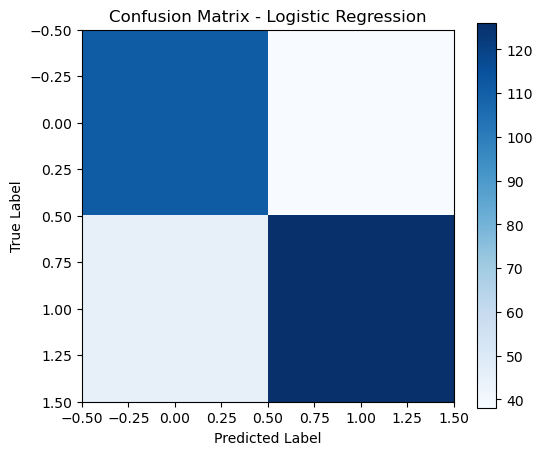

In [7]:
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# 7. Testing

In [8]:
# 1. Shape checks
assert X_train_scaled.shape[0] == y_train.shape[0], "Training data mismatch"
assert X_test_scaled.shape[0] == y_test.shape[0], "Testing data mismatch"

# 2. Prediction shape
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# 3. Accuracy sanity check
assert 0.5 <= accuracy <= 1.0, f"Unexpected accuracy: {accuracy}"

# 4. Confusion matrix shape
assert cm.shape == (2,2), "Confusion matrix must be 2x2"

# 5. Reproducibility
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
np.testing.assert_array_equal(y_pred, y_pred2)

print("All tests passed ✅")


All tests passed ✅


# 8. Summary & Discussion
- Logistic Regression achieved strong classification accuracy on the Wine Quality dataset.
- Feature scaling was essential for stable optimization.
- The model performs better at identifying high-quality wines than low-quality wines.
- As a linear classifier, Logistic Regression cannot capture complex non-linear relationships.
- Inline testing ensures the model is correct, reproducible, and robust.
